## Resolución del problema de Deutsch

Un caso de estudio de gran importancia para la Computación Cuántica es el **Problema de Deutsch**. La solución a este problema refleja la potencia de cálculo de los ordenadores cuánticos, y ha servido como precursor para los famosos *algoritmos de Shor* y *Grover* que permiten factorizar números en tiempo polinómico y buscar en listas desordenadas con complejidad $O(\sqrt{n})$ respectivamente.  

Para explicar este problema, supongamos que tenemos una función $f:\{0,1\} \to \{0,1\}$, las posibilidades de definir la función son: 
- $f_{1}$ definida como $f_{1}(0) = 0$ y $f_{1}(1) = 1$
- $f_{2}$ definida como $f_{2}(0) = 0$ y $f_{2}(1) = 0$
- $f_{3}$ definida como $f_{3}(0) = 1$ y $f_{3}(1) = 1$
- $f_{4}$ definida como $f_{4}(0) = 1$ y $f_{4}(1) = 0$

Podemos agrupar claramente en dos a estas funciones: funciones constantes ($f_{2}$ y $f_{3}$) y funciones no constantes ($f_{1}$ y $f_{4}$).

El **Problema de Deutsch** consiste en dada una función que no sabemos cuál es (si es constante o no) y cumpliendo que $f:\{0,1\} \to \{0,1\}$, adivinar con el mínimo número de preguntas de qué tipo es la función (constante o no). Esto es, si preguntamos a la función qué valor le asignaría a $1$ se consideraría una pregunta, igualmente si preguntamos por el valor $0$. En Computación Clásica este dilema tiene una solución sencilla por simple inspección, hay que realizar dos preguntas: cuánto vale $0$ y cuánto vale $1$. Si solamente supiésemos el valor de $1$ (evaluado por la función), nos seguirían quedando dos opciones posibles (igualmente para $0$). 

Sin embargo, en el modelo de Computación Cuántica podemos resolver este problema preguntándole una única vez a la función. Para abordar este problema definiremos primero la función $f$ de forma que sea válida en computación cuántica. Recordemos que toda puerta cuántica debe ser reversible (por ser una matriz unitaria). 




## Solución cuántica al problema

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

from enum import Enum
class functionType(Enum):
    CONSTANT0 = 0
    CONSTANT1 = 1
    IDENTITY = 2
    NEGATION = 3
    
class BlackBox:
    def __init__(self, oracle):
        self.oracle = oracle
    def build(self):
        sub_circ = QuantumCircuit(2, name="BlackBox")
        if self.oracle == functionType.CONSTANT0:
            sub_circ.iden(0)
            sub_circ.iden(1)
        elif self.oracle == functionType.CONSTANT1: 
            sub_circ.x(0)          
        elif self.oracle == functionType.IDENTITY:
            sub_circ.cx(0, 1) 
        elif self.oracle == functionType.NEGATION:
            sub_circ.cx(0, 1)
            sub_circ.x(0)
        return sub_circ.to_instruction() # conversión a puerta cuántica

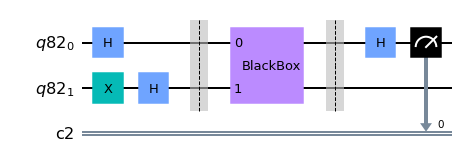

In [10]:
oracle1 = BlackBox(functionType.NEGATION)
blackbox_circuit = oracle1.build()

qr = QuantumRegister(2)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)
circuit.x(qr[1])
circuit.h(qr[0])
circuit.h(qr[1])
circuit.barrier()
circuit.append(blackbox_circuit, [qr[0], qr[1]])
circuit.barrier()
circuit.h(qr[0])
circuit.measure(qr[0], cr[0])
circuit.draw(output='mpl')

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


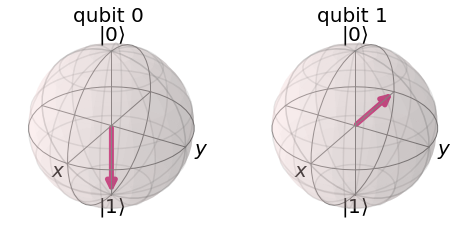

In [11]:
from qiskit import Aer, execute 
from qiskit.visualization import plot_bloch_multivector  
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, simulator).result()
statevector = result.get_statevector(circuit)
plot_bloch_multivector(statevector)

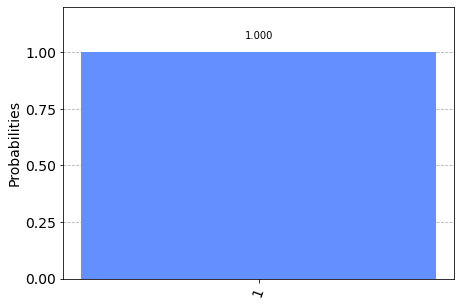

In [12]:
from qiskit import BasicAer
backend = BasicAer.get_backend('qasm_simulator') 
result = execute(circuit, backend, shots=1000).result()
counts  = result.get_counts(circuit)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

## INTERPRETACION:
- Si se obtiene el estado |0> en el qbit de salida ( registro datos) entonces la funcion es constante, y 
- Si se obtiene el estado |1> la funcion es balanceada.



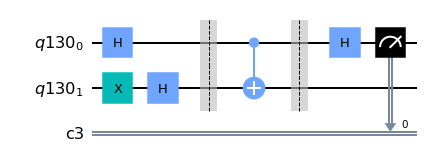

In [13]:
oracle1 = BlackBox(functionType.CONSTANT1)
blackbox_circuit = oracle1.build()

qr = QuantumRegister(2)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)
circuit.x(qr[1])
circuit.h(qr[0])
circuit.h(qr[1])
circuit.barrier()
circuit.cx(qr[0],qr[1])
# f(A)= A
#circuit.append(blackbox_circuit, [qr[0], qr[1]])
circuit.barrier()
circuit.h(qr[0])
circuit.measure(qr[0], cr[0])
circuit.draw(output='mpl')

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


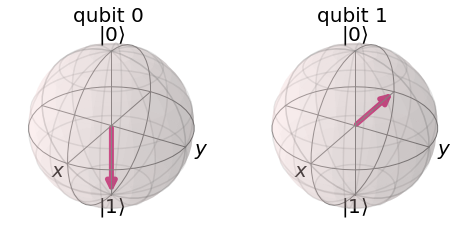

In [14]:
from qiskit import Aer, execute 
from qiskit.visualization import plot_bloch_multivector  
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, simulator).result()
statevector = result.get_statevector(circuit)
plot_bloch_multivector(statevector)

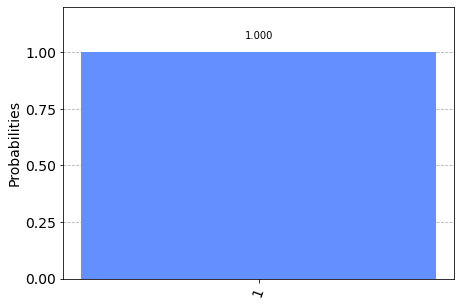

In [15]:
from qiskit import BasicAer
backend = BasicAer.get_backend('qasm_simulator') 
result = execute(circuit, backend, shots=1000).result()
counts  = result.get_counts(circuit)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

## INTERPRETACION:
- Si se obtiene el estado |0> en el qbit de salida ( registro datos) entonces la funcion es constante, y 
- Si se obtiene el estado |1> la funcion es balanceada.


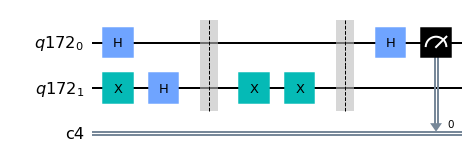

In [16]:
qra = QuantumRegister(2)
cra = ClassicalRegister(1)
circuita = QuantumCircuit(qra, cra)
circuita.x(qra[1])
circuita.h(qra[0])
circuita.h(qra[1])
circuita.barrier()
# f(A)= 0

circuita.x(qra[1])
circuita.x(qra[1])
circuita.barrier()

circuita.h(qra[0])
circuita.measure(qra[0], cra[0])
circuita.draw(output='mpl')

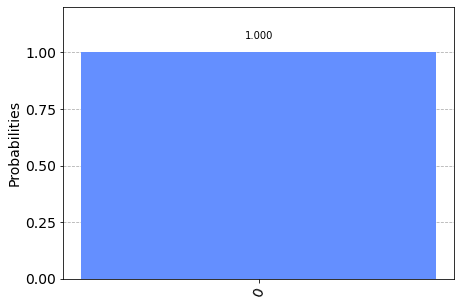

In [17]:
from qiskit import BasicAer
backend = BasicAer.get_backend('qasm_simulator') 
resulta = execute(circuita, backend, shots=1000).result()
countsa = resulta.get_counts(circuita)

from qiskit.visualization import plot_histogram
plot_histogram(countsa)

## INTERPRETACION:
- Si se obtiene el estado |0> en el qbit de salida ( registro datos) entonces la funcion es constante, y 
- Si se obtiene el estado |1> la funcion es balanceada.
